In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [73]:
class Perceptron:
    
    def __init__(self, num_inputs):
        self.weights = []
        self.num_inputs = num_inputs
        for _ in range(0, num_inputs):
            self.weights.append(random.random() * 2 - 1)
        print(self.weights)
        
    def feed_forward(self, inputs):
        self.inputs = inputs
        sum = 0
        for i in range(0, self.num_inputs):
            sum += self.weights[i] * inputs[i]
        self.output = self.activation(sum)
        return self.output
    
    def activation(self, x):
        if x >= 0:
            return 1
        return 0
    
    def backward_pass(self, error):
        learning_rate = 0.01
        for i in range(0, self.num_inputs):
            self.weights[i] -= error * self.inputs[i] * learning_rate
            
    def get_weights(self):
        return self.weights

In [22]:
p = Perceptron(5)

[-0.2765020002034475, -0.9013155075254977, -0.664592009534086, 0.7465998660541739, -0.1310599812655988]


In [23]:
p.feed_forward([1, 2, 3, 4, 5])

0

In [24]:
def line(x):
    return 0.5 * x

In [25]:
line(10)

5.0

In [146]:
def graph(formula, weights = []):
    x = np.array(range(0, 1000))
    y = formula(x)
    plt.plot(x, y)
    
    if len(weights) == 2:
        y2 = (-weights[0] / weights[1]) * x
        plt.plot(x, y2)
        
    if len(weights) == 3:
        y2 = (-weights[0] / weights[1]) * x - (weights[2] / weights[1])
        plt.plot(x, y2)
    
    plt.xlim(0, 1000)
    plt.ylim(0, 1000)
    plt.show()

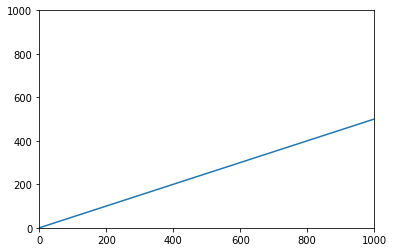

In [27]:
graph(line)

In [116]:
p = Perceptron(2)

[0.8450149993337561, -0.3384658429634084]


In [51]:
x_coord = random.random() * 1000
y_coord = random.random() * 1000
line_y = line(x_coord)

print(x_coord, y_coord)
print(x_coord, line_y)

if y_coord > line_y:
    answer = 1
else:
    answer = 0
    
print(answer)

503.26432058114636 21.80637500591953
503.26432058114636 251.63216029057318
0


In [118]:
correct = 0
for _ in range(0, 1000):
    x_coord = random.random() * 1000
    y_coord = random.random() * 1000
    line_y = line(x_coord)
    
    is_above = y_coord > line_y
    guess_above = p.feed_forward([x_coord, y_coord])
    
    if (is_above == True) and guess_above >= 0.5:
        correct += 1
    if (is_above == False) and guess_above < 0.5:
        correct += 1
        
print(correct)

539


In [125]:
# training loop
for _ in range(0, 5):
    x_coord = random.random() * 1000
    y_coord = random.random() * 1000
    line_y = line(x_coord)
    
    if y_coord > line_y:
        answer = 1
    else:
        answer = 0
        
    guess = p.feed_forward([x_coord, y_coord])
    p.backward_pass(guess - answer)
    
print(p.get_weights())

[-5.479322250188181, 9.610370070221213]


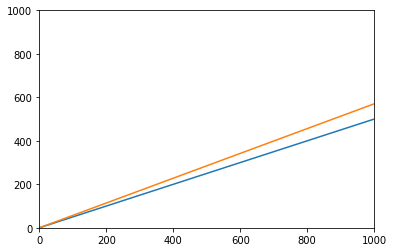

In [126]:
graph(line, p.get_weights())

In [128]:
def line(x):
    return 0.5 * x + 500

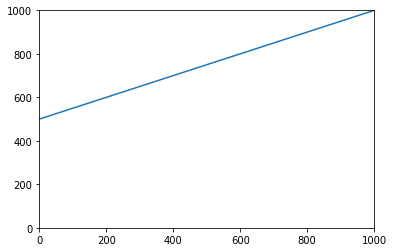

In [129]:
graph(line)

In [134]:
p = Perceptron(3)

[0.22359914019261473, -0.9287602058239934, -0.6492582929579929]


In [144]:
correct = 0
for _ in range(0, 1000):
    x_coord = random.random() * 1000
    y_coord = random.random() * 1000
    line_y = line(x_coord)
    
    is_above = y_coord > line_y
    guess_above = p.feed_forward([x_coord, y_coord, 1])
    
    if (is_above == True) and guess_above >= 0.5:
        correct += 1
    if (is_above == False) and guess_above < 0.5:
        correct += 1
        
print(correct)

821


In [155]:
# training loop
for _ in range(0, 10000000):
    x_coord = random.random() * 1000
    y_coord = random.random() * 1000
    line_y = line(x_coord)
    
    if y_coord > line_y:
        answer = 1
    else:
        answer = 0
        
    guess = p.feed_forward([x_coord, y_coord, 1])
    p.backward_pass(guess - answer)
    
print(p.get_weights())

[-17.952399499647868, 19.71292370003205, -5211.329258360289]


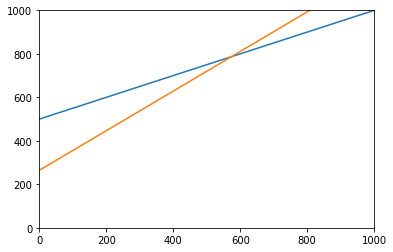

In [156]:
graph(line, p.get_weights())